<a href="https://colab.research.google.com/github/khotimnr/Imbalance-Class/blob/main/Preprocessing_Imbalance_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imbalance** **Class**

In [ ]:
import pandas as pd                  # A fundamental package for linear algebra and multidimensional arrays
import numpy as np                   # Data analysis and data manipulating tool
import random                        # Library to generate random numbers
from collections import Counter      # Collection is a Python module that implements specialized container datatypes providing 
                                     # alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
                                     # Counter is a dict subclass for counting hashable objects
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd  
reload_data = pd.read_csv('data_reload_train_new.csv',sep=';')
reload_data

,available_points,tenure_rgu,rld_tot_30d,rld_tot_60d,rld_tot_90d,reload_p90d,denom_30d,denom_60d,denom_90d,curr_balance,...,rld_30d,rld_60d,rld_90d,tot_month_rld,active_pack,status,cust_flag,X_kategori_denom30d,X_kategori_frek_dan_denom,X_kategori_tenure
0,4925,982,0,0,112000,112000,0,0,"1,00E+05",175,...,0,0,1,1,1.0,ACTIVE,Moderate,sedikit,jarang & sedikit,baru
1,3335,1307,0,50000,60000,110000,0,25000,25000,100,...,0,1,1,2,1.0,ACTIVE,Moderate,sedikit,jarang & sedikit,baru
2,500,871,20000,5000,0,25000,10000,5000,0,6,...,1,1,0,2,0.0,ACTIVE,Moderate,sedikit,sering & sedikit,baru
3,11497,663,125000,145000,130000,"4,00E+05",50000,50000,50000,27850,...,1,1,1,3,1.0,ACTIVE,Healthy,banyak,sering & banyak,lama
4,1200,1307,20000,0,0,20000,20000,0,0,0,...,1,0,0,1,1.0,ACTIVE,Moderate,banyak,jarang & banyak,baru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50174,2775,560,125000,125000,50000,"3,00E+05",25000,50000,40000,0,...,1,1,1,3,1.0,ACTIVE,Healthy,banyak,sering & banyak,lama
50175,6725,1179,225000,145000,"1,00E+05",470000,"1,00E+05",50000,"1,00E+05",796,...,1,1,1,3,1.0,ACTIVE,Healthy,banyak,sering & banyak,baru
50176,255,1329,0,0,20000,20000,0,0,20000,0,...,0,0,1,1,1.0,ACTIVE,Moderate,sedikit,jarang & sedikit,baru
50177,3725,643,60000,70000,0,130000,30000,40000,0,50,...,1,1,0,2,1.0,ACTIVE,Moderate,banyak,sering & banyak,lama


In [ ]:
reload_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50179 entries, 0 to 50178
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   available_points           50179 non-null  object 
 1   tenure_rgu                 50179 non-null  int64  
 2   rld_tot_30d                50179 non-null  object 
 3   rld_tot_60d                50179 non-null  object 
 4   rld_tot_90d                50179 non-null  object 
 5   reload_p90d                50179 non-null  object 
 6   denom_30d                  50179 non-null  object 
 7   denom_60d                  50179 non-null  object 
 8   denom_90d                  50179 non-null  object 
 9   curr_balance               50179 non-null  object 
 10  n_days                     50179 non-null  int64  
 11  arpu_rld                   50179 non-null  object 
 12  X_ratio_curr_per_arpu      50179 non-null  object 
 13  X_frek_rld_per_month       50179 non-null  obj

In [ ]:
reload_data.rld_nm.value_counts()  

0    32510
1    17669
Name: rld_nm, dtype: int64

In [ ]:
reload_data.rld_nm.value_counts() / len(fraud_data) * 10

0    6.478806
1    3.521194
Name: rld_nm, dtype: float64

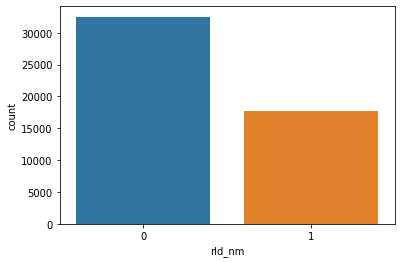

In [ ]:
sns.countplot(reload_data.rld_nm)

Missing Value

In [ ]:
reload_data.isnull().sum() / len(reload_data) * 100 

available_points             0.000000
tenure_rgu                   0.000000
rld_tot_30d                  0.000000
rld_tot_60d                  0.000000
rld_tot_90d                  0.000000
reload_p90d                  0.000000
denom_30d                    0.000000
denom_60d                    0.000000
denom_90d                    0.000000
curr_balance                 0.000000
n_days                       0.000000
arpu_rld                     0.000000
X_ratio_curr_per_arpu        0.000000
X_frek_rld_per_month         0.000000
rld_nm                       0.000000
current_tier                 0.000000
vlr_attached_p3d             0.000000
flag_arpu_90d                0.000000
flag_arpu_last_30d           0.000000
rgu_flag                     0.000000
rld_30d                      0.000000
rld_60d                      0.000000
rld_90d                      0.000000
tot_month_rld                0.000000
active_pack                  0.001993
status                       0.001993
cust_flag   

In [ ]:
cat_cols = reload_data.select_dtypes(include = 'object').columns    # getting all the categorical columns

reload_data[cat_cols] = reload_data[cat_cols].fillna(reload_data[cat_cols].mode().iloc[0])  # fills the missing values with maximum occuring element in the column


In [ ]:
num_cols = reload_data.select_dtypes(include=np.number).columns      # getting all the numerical columns

reload_data[num_cols] = reload_data[num_cols].fillna(reload_data[num_cols].mean())   # fills the missing values with mean

In [ ]:
reload_data.isnull().sum() / len(reload_data) * 100

available_points             0.0
tenure_rgu                   0.0
rld_tot_30d                  0.0
rld_tot_60d                  0.0
rld_tot_90d                  0.0
reload_p90d                  0.0
denom_30d                    0.0
denom_60d                    0.0
denom_90d                    0.0
curr_balance                 0.0
n_days                       0.0
arpu_rld                     0.0
X_ratio_curr_per_arpu        0.0
X_frek_rld_per_month         0.0
rld_nm                       0.0
current_tier                 0.0
vlr_attached_p3d             0.0
flag_arpu_90d                0.0
flag_arpu_last_30d           0.0
rgu_flag                     0.0
rld_30d                      0.0
rld_60d                      0.0
rld_90d                      0.0
tot_month_rld                0.0
active_pack                  0.0
status                       0.0
cust_flag                    0.0
X_kategori_denom30d          0.0
X_kategori_frek_dan_denom    0.0
X_kategori_tenure            0.0
dtype: flo

Creating dummies for categorical columns

In [ ]:
reload_data = pd.get_dummies(reload_data, columns=cat_cols)    # earlier we have collected all the categorical columns in cat_cols

In [ ]:
reload_data.head()

,tenure_rgu,n_days,rld_nm,vlr_attached_p3d,rld_30d,rld_60d,rld_90d,tot_month_rld,active_pack,available_points_0,...,cust_flag_Healthy,cust_flag_Moderate,X_kategori_denom30d_banyak,X_kategori_denom30d_sedikit,X_kategori_frek_dan_denom_jarang & banyak,X_kategori_frek_dan_denom_jarang & sedikit,X_kategori_frek_dan_denom_sering & banyak,X_kategori_frek_dan_denom_sering & sedikit,X_kategori_tenure_baru,X_kategori_tenure_lama
0,982,299,0,1,0,0,1,1,1.0,0,...,0,1,0,1,0,1,0,0,1,0
1,1307,323,1,1,0,1,1,2,1.0,0,...,0,1,0,1,0,1,0,0,1,0
2,871,88,1,1,1,1,0,2,0.0,0,...,0,1,0,1,0,0,0,1,1,0
3,663,360,1,1,1,1,1,3,1.0,0,...,1,0,1,0,0,0,1,0,0,1
4,1307,50,1,1,1,0,0,1,1.0,0,...,0,1,1,0,1,0,0,0,1,0


In [ ]:
# Separate input features and output feature
X = reload_data.drop(columns = ['rld_nm'])       # input features
Y = reload_data.rld_nm     # output feature
Y.value_counts()  

0    32510
1    17669
Name: rld_nm, dtype: int64

Standardization / Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

In [ ]:
# Let's see how the data looks after scaling
scaled_features.head()

,tenure_rgu,n_days,vlr_attached_p3d,rld_30d,rld_60d,rld_90d,tot_month_rld,active_pack,available_points_0,available_points_10,...,cust_flag_Healthy,cust_flag_Moderate,X_kategori_denom30d_banyak,X_kategori_denom30d_sedikit,X_kategori_frek_dan_denom_jarang & banyak,X_kategori_frek_dan_denom_jarang & sedikit,X_kategori_frek_dan_denom_sering & banyak,X_kategori_frek_dan_denom_sering & sedikit,X_kategori_tenure_baru,X_kategori_tenure_lama
0,0.559991,0.770796,0.0,-1.946415,-1.798575,0.582236,-1.636621,0.530869,-0.081858,-0.015466,...,-0.888674,0.888674,-1.161316,1.161316,-0.756713,1.501664,-0.515748,-0.366744,1.061791,-1.061791
1,1.309051,0.955083,0.0,-1.946415,0.555996,0.582236,-0.379480,0.530869,-0.081858,-0.015466,...,-0.888674,0.888674,-1.161316,1.161316,-0.756713,1.501664,-0.515748,-0.366744,1.061791,-1.061791
2,0.304158,-0.849398,0.0,0.513765,0.555996,-1.717515,-0.379480,-1.883740,-0.081858,-0.015466,...,-0.888674,0.888674,-1.161316,1.161316,-0.756713,-0.665928,-0.515748,2.726695,1.061791,-1.061791
3,-0.175241,1.239193,0.0,0.513765,0.555996,0.582236,0.877661,0.530869,-0.081858,-0.015466,...,1.125272,-1.125272,0.861092,-0.861092,-0.756713,-0.665928,1.938933,-0.366744,-0.941805,0.941805
4,1.309051,-1.141187,0.0,0.513765,-1.798575,-1.717515,-1.636621,0.530869,-0.081858,-0.015466,...,-0.888674,0.888674,0.861092,-0.861092,1.321504,-0.665928,-0.515748,-0.366744,1.061791,-1.061791


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

**Resampling Techniques - Oversample Minority Clas**

In [ ]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

In [ ]:
# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

In [ ]:
# separate minority and majority class
not_reload = train_data[train_data.rld_nm==0]
reload = train_data[train_data.rld_nm==1]

In [ ]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
reload_upsampled = resample(reload,
                           replace = True, # Sample with replacement
                           n_samples = len(not_reload), # Match number in majority class
                           random_state=27)

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([not_reload, reload_upsampled])

In [ ]:
# Now let's check the classes count
upsampled.rld_nm.value_counts()

0    22753
1    22753
Name: rld_nm, dtype: int64

**Resampling Techniques - Undersample Majority Class**

In [ ]:
# downsample majority
not_reload_downsampled = resample(not_reload,
                                replace = False, # sample without replacement
                                n_samples = len(reload), # match minority n
                                random_state = 27)

In [ ]:
# combine minority and downsampled majority
downsampled = pd.concat([not_reload_downsampled, reload]) 

In [ ]:
# let's check the classes counts
downsampled.rld_nm.value_counts()

0    12372
1    12372
Name: rld_nm, dtype: int64

**Generate Synthetic Samples**

In [ ]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)

In [ ]:
# fit the sampling
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

In [ ]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([22753, 12372]))